In [0]:
import numpy as np

In [0]:
def hash_func(a, b, p, n_buckets, x):
  y = x % p
  hash_val = (a * y + b) % p
  return hash_val % n_buckets

In [0]:
DELTA = np.exp(-5)
EPSILON = np.exp(1) * 1e-4
P = 123457

n_buckets = int(np.ceil(np.exp(1)/EPSILON))
n_hash = int(np.log(1/DELTA))

In [0]:
a_lst = []
b_lst = []
with open('hash_params.txt', 'r') as f:
    for line in f:
        a_lst.append(int(line.split('\t')[0]))                
        b_lst.append(int(line.split('\t')[1]))

In [0]:
# tiny 
F_tiny = []

c_tiny = np.zeros((n_hash, n_buckets))

with open('counts_tiny.txt', 'r') as f:
    for line in f:
        F_tiny.append(int(line.split('\t')[1]))

F_tiny = np.array(F_tiny)
tF_tiny = np.zeros(len(F_tiny))

In [0]:
t_tiny = 0
with open('words_stream_tiny.txt', 'r') as f:
    for line in f:
        t_tiny += 1
        word = int(line)
        for j in range(n_hash):
            hash_j = hash_func(a_lst[j], b_lst[j], P, n_buckets, word)
            c_tiny[j, hash_j] += 1

In [0]:
err = []

for i in range(len(F_tiny)):
    c_lst = []
    for j in range(n_hash):
        hash_i = hash_func(a_lst[j], b_lst[j], P, n_buckets, i+1)
        c_lst.append(c_tiny[j, hash_i])
    tF_tiny[i] = min(c_lst)
    err.append((tF_tiny[i]-F_tiny[i])/F_tiny[i])

err = np.array(err)

In [41]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 300

plt.figure()
plt.loglog(F_tiny/t_tiny, err, '.')
plt.ylabel('relative error')
plt.title('Relative error vs exact word frequency (n = 5, n_buckets = 10000)')
plt.grid()

SyntaxError: ignored

In [39]:
# words_stream.txt 
import time

start_time = time.time()

F = []

c = np.zeros((n_hash, n_buckets))

with open('counts.txt', 'r') as f:
    for line in f:
        F.append(int(line.split('\t')[1]))

F = np.array(F)
tF = np.zeros(len(F))

t = 0
with open('words_stream.txt', 'r') as f:
    for line in f:
        t += 1
        word = int(line)
        for j in range(n_hash):
            hash_j = hash_func(a_lst[j], b_lst[j], P, n_buckets, word)
            c[j, hash_j] += 1

err = []

for i in range(len(F)):
    c_lst = []
    for j in range(n_hash):
        hash_i = hash_func(a_lst[j], b_lst[j], P, n_buckets, i+1)
        c_lst.append(c[j, hash_i])
    tF[i] = min(c_lst)
    err.append((tF[i]-F[i])/F[i])

err = np.array(err)

print('Time spent: {}'.format(time.time()-start_time))

Time spent: 1219.958139181137


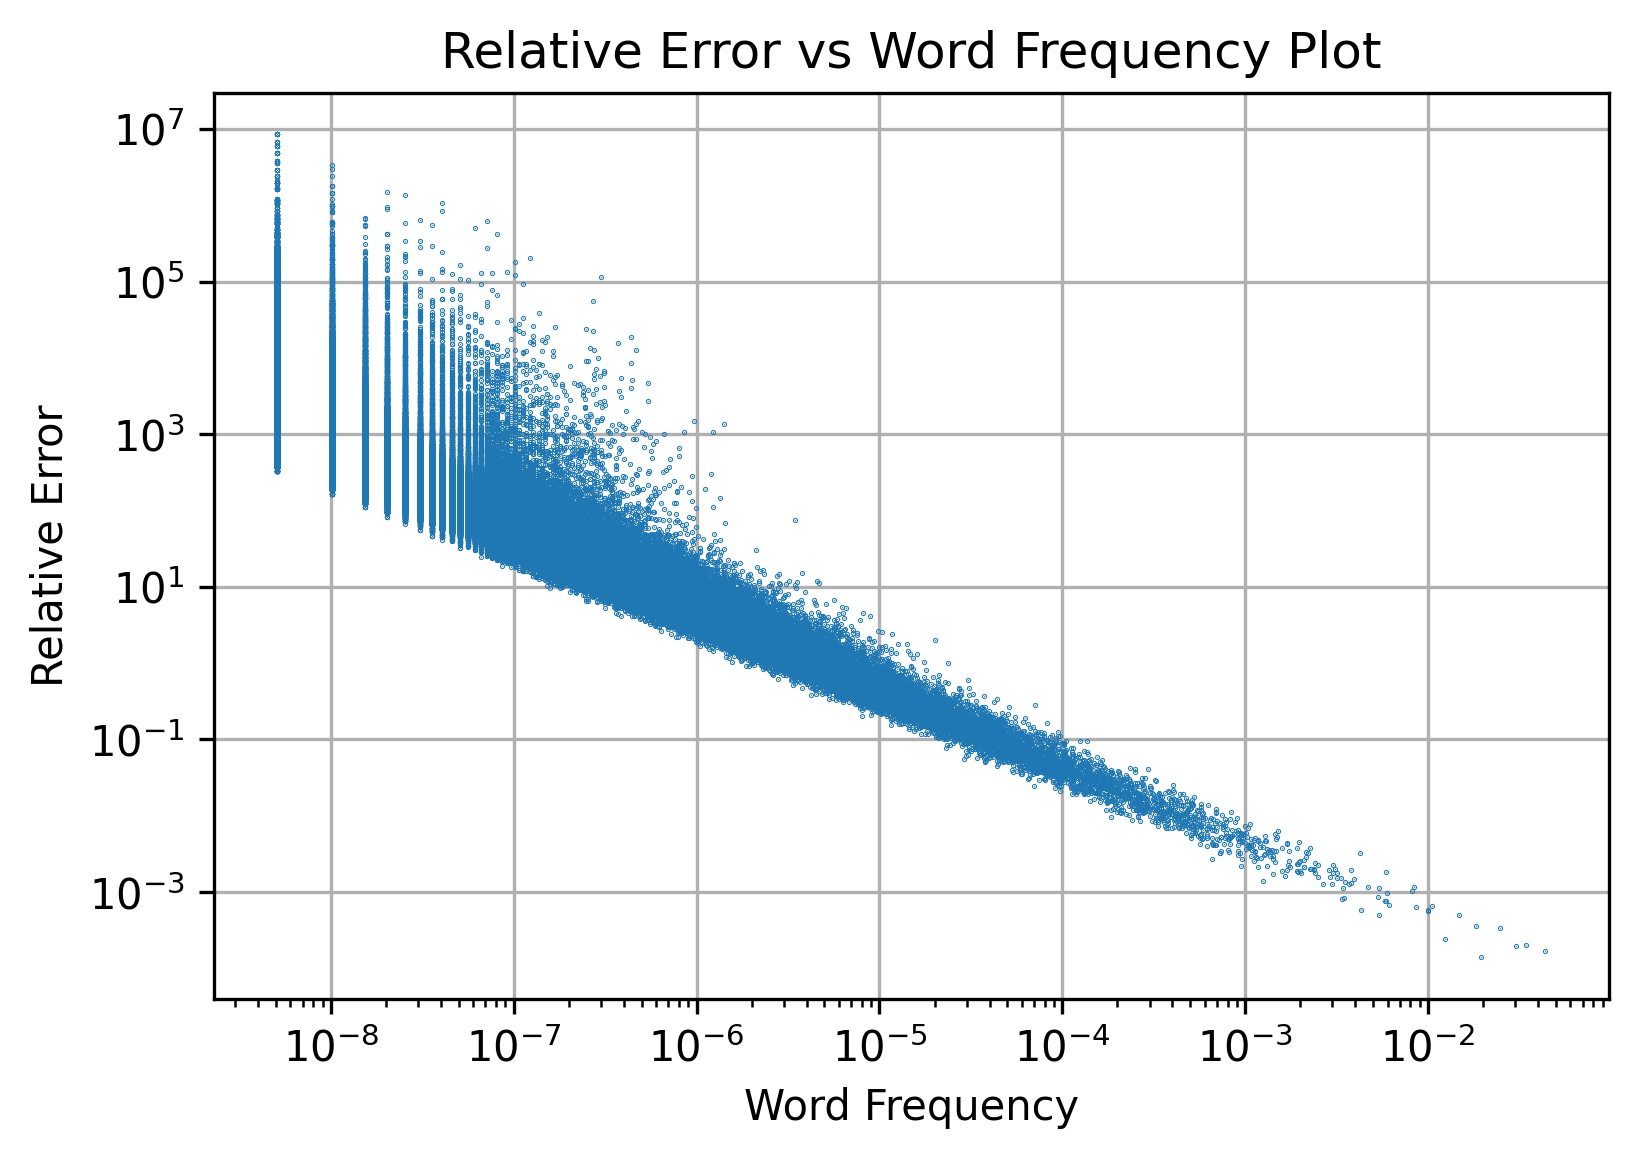

In [47]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 300

plt.figure()
plt.loglog(F/t, err, '.',markersize=0.5)
plt.xlabel('Word Frequency')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Word Frequency Plot')
plt.grid()